Sentiment Analysis for Amazon Reviews

CONTENT

Aim of the Project
Dataset
IMPORT LIBRARIRES
LOAD DATA SET
Standardization
Punctuation Removal
Number Removal
Stopwords
Rare Words
Lemmatization
Visualization
Wordcloud
Sentiment Analysis
Modelling
CountVectorize()
Logistig Regression with CountVectorize()
TF-IDF
Logistig Regression with TF-IDF
TF-IDF- Ngram
Logistig Regression with Ngram
Random Forest
Result
Conclusion

In [22]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns  

#### NLTK#### 

import nltk 
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer 
from textblob import Word, TextBlob

## Sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [1]:
import pandas as pd
df=pd.read_excel(r"D:\Practice\Mini-Projects\Data\amazon.xlsx") 
df.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


In [2]:
def check_df(dataframe, head=5):
    """
    Provides a general overview of the dataset.
    
    Parameters:
    dataframe: The dataframe to be read and analyzed.
    head (int): The number of rows to display initially. The default value is 5.
    """
    print("The first {} rows of the DataFrame:".format(head))
    display(dataframe.head(head))
    print("---------------------------------")
    print("Shape information of the DataFrame:")
    display(dataframe.shape)
    print("---------------------------------")
    print("General information about the DataFrame:")
    dataframe.info()
    print("---------------------------------")
    print("Missing value information in the DataFrame:")
    display(dataframe.isnull().sum())
    print("---------------------------------")
    return True

check_df(df)

The first 5 rows of the DataFrame:


,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


---------------------------------
Shape information of the DataFrame:


(5611, 4)

---------------------------------
General information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Star     5611 non-null   int64 
 1   HelpFul  5611 non-null   int64 
 2   Title    5559 non-null   object
 3   Review   5593 non-null   object
dtypes: int64(2), object(2)
memory usage: 175.5+ KB
---------------------------------
Missing value information in the DataFrame:


Star        0
HelpFul     0
Title      52
Review     18
dtype: int64

---------------------------------


True

In [3]:
df[df["Review"].isnull()]["Star"].value_counts()

Star
5    11
1     3
4     2
3     1
2     1
Name: count, dtype: int64

In [6]:
df[df["Title"].isnull()]["Star"].value_counts()

Star
5    37
1     6
3     4
4     4
2     1
Name: count, dtype: int64

In [7]:
df[(df["Title"].isnull()) & (df["Review"].isnull())].shape

(9, 4)

In [9]:
df= df[~df["Review"].isnull()]

In [10]:
df.isnull().sum()

Star        0
HelpFul     0
Title      43
Review      0
dtype: int64

In [11]:
df["Review"].head(10)

0                                        Happy with it
1    Good quality material however the panels are m...
2    Product was fun for bedroom windows.<br />Imag...
3     Lo unico que me gustaria es que sean un poco ...
4    Great bang for the buck I can't believe the qu...
5                           Looks different then photo
6    Was exactly what i was looking for. Heavy mate...
7    Looking at the picture, I thought these curtai...
8    Much whiter than I thought it would be and was...
9    These are curtains just as the picture shows. ...
Name: Review, dtype: object

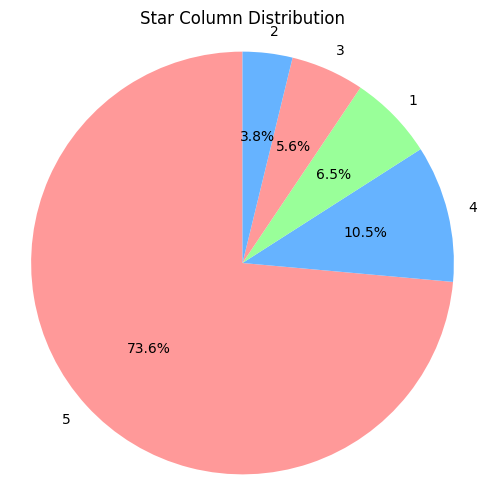

In [13]:
import matplotlib.pyplot as plt
star_counts = df["Star"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(star_counts, labels=star_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("Star Column Distribution")
plt.axis('equal')  
plt.show()

Standardization

We need to convert all letters to lowercase because converting words that start with uppercase letters but have the same meaning helps machines understand them better. By standardizing to lowercase format, we reduce the complexity of the text and ensure that similar words are treated as the same, improving the accuracy of text processing and analysis.

In [14]:
df["Review"]= df["Review"].str.lower()

Punctuation Removal

Removing punctuation marks is important in NLP as they can disrupt word analysis. By eliminating punctuation, we clean the text, allowing algorithms to focus on the content and improve the accuracy of tasks like sentiment analysis.

In [16]:
df["Review"]= df["Review"].str.replace('[^\w\s]', '',regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\agarw\AppData\Local\Temp\ipykernel_21776\1413864351.py:1: SyntaxWarning: invalid escape sequence '\w'
  df["Review"]= df["Review"].str.replace('[^\w\s]', '',regex=True)


Number Removal

Removing numbers from text is essential in NLP because they often do not contribute to the meaning in sentiment analysis or text classification.

In [ ]:
df["Review"]= df["Review"].str.replace('\d',"")

Stopwords

We remove stopwords, which are common words that carry little meaning, from the text. These words often include articles, prepositions, and conjunctions that do not add significant value to the analysis, allowing the model to focus on more meaningful terms.

In [24]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agarw\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [25]:
sw = stopwords.words('english')

In [26]:
sw[:10]

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

In [27]:
df['Review']= df['Review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

Rare Words

This step involves removing words that occur fewer than 1 times in the dataset. Rare words can introduce noise and don't contribute significantly to sentiment analysis. By eliminating them, we focus on more relevant terms, improving the dataset's quality for model training.

In [28]:
new_df = pd.Series(' '.join(df['Review']).split()).value_counts()

# select words lest than 1 
rare_words = new_df[new_df <= 1] 

# elimate these words from each row 
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))

Lemmatization:

Lemmatization is the process of reducing words to their base or root form, known as the lemma. For example, the words "glasses," "eye," and "eyes" all reduce to the root word "eye." This helps standardize words, making text analysis more effective by treating different forms of a word as the same.

In [32]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\agarw\AppData\Roaming\nltk_data...


True

In [33]:
lemmatizer= WordNetLemmatizer() 

In [34]:
def lemmatize(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [35]:
df["Review"]= df["Review"].apply(lambda x : lemmatize(x))

Visualization

In [36]:
count_df= pd.Series(" ".join(df["Review"]).split()).value_counts()

count_df= count_df.reset_index()

count_df.columns=["words","tf"]

In [37]:
count_df[count_df["tf"]>500]

,words,tf
0,curtain,2588
1,look,1530
2,love,1453
3,room,1129
4,like,1053
5,beautiful,943
6,great,921
7,quality,889
8,color,787
9,picture,719


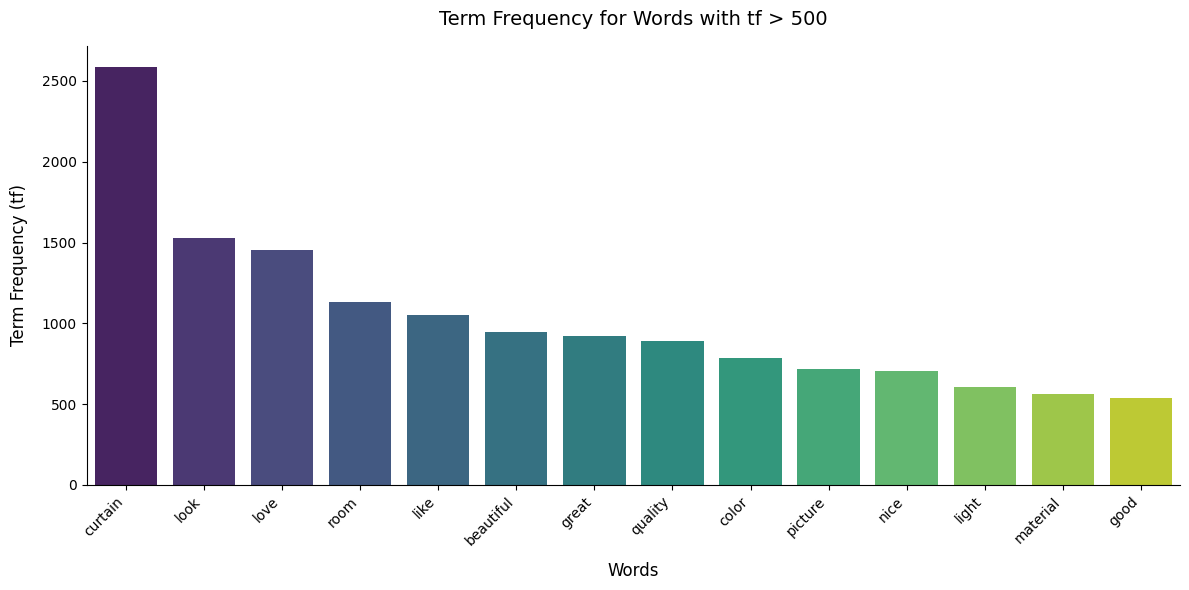

In [38]:
plt.figure(figsize=(12, 6)) 

sns.barplot(data=count_df[count_df["tf"] > 500], x="words", y="tf", palette="viridis") 

plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and align the labels

# Add title to axes

plt.xlabel("Words", fontsize=12, labelpad=10)  # X-axis title and label padding

plt.ylabel("Term Frequency (tf)", fontsize=12, labelpad=10)  # Y-axis title

# Graph title

plt.title("Term Frequency for Words with tf > 500", fontsize=14, pad=15)

# Graph borders
sns.despine()  # We can remove the borders around the graph
# Show the graph

plt.tight_layout()  # Ensures all elements are displayed neatly

plt.show()

Wordcloud

A word cloud is a technique that visually represents the frequency of words in a text. Words that appear more frequently are displayed in larger fonts, while less common words are shown in smaller fonts

In [39]:
text= " ".join(df["Review"])

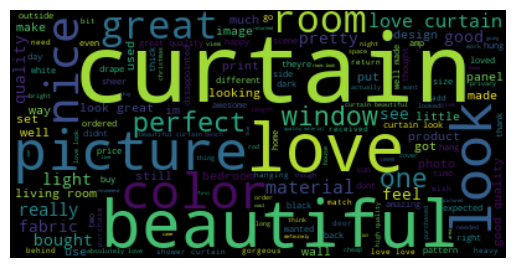

In [40]:
wordcloud_result= WordCloud().generate(text)

plt.imshow(wordcloud_result, interpolation="bilinear")

plt.axis("off")

plt.show()

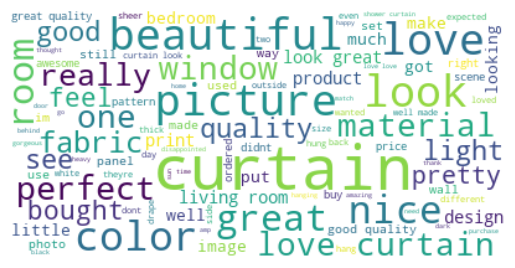

In [41]:
wordcloud = WordCloud(max_font_size=50,

                      max_words=100,

                      background_color="white").generate(text)

plt.figure()

plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")

plt.show()

Sentiment Analysis:

Sentiment analysis is a natural language processing (NLP) technique used to determine the emotional tone behind a series of words. It involves classifying text as positive, negative, or neutral based on the sentiments expressed within. This analysis helps in understanding opinions, attitudes, and emotions towards a product, service, or topic, and is commonly used in social media monitoring, customer feedback, and market research.

In [42]:
nltk.download("vader_lexicon") 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\agarw\AppData\Roaming\nltk_data...


True

In [43]:
sia= SentimentIntensityAnalyzer()

In [44]:
sia.polarity_scores("The story is excellent")

#The line essentially tries to determine the sentiment of the text: whether it is positive or negative.

#In this context, a compound score greater than 0 typically indicates a positive sentiment.

{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}

In [45]:
df["Review"][0:10].apply(lambda x : sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
1    {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou...
2    {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.0, 'neu': 0.495, 'pos': 0.505, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'comp...
7    {'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'comp...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp...
Name: Review, dtype: object

In [46]:
df["Review"][0:10].apply(lambda x : sia.polarity_scores(x)["compound"]).sort_values(ascending=False)

7   0.91
4   0.90
2   0.72
9   0.71
6   0.62
0   0.57
1   0.44
3   0.00
5   0.00
8   0.00
Name: Review, dtype: float64

In [47]:
df["compound_score"]=df["Review"].apply(lambda x : sia.polarity_scores(x)["compound"])

In [48]:
df["sentiment_label"]=df["compound_score"].apply(lambda x: "pos" if x > 0.0 else "neg")

In [49]:
df[(df["compound_score"]> 0.6) & (df["Star"]<3)].head(10)

,Star,HelpFul,Title,Review,compound_score,sentiment_label
131,1,3,I also did not like the way these curtains wer...,returning curtain look bright shown online mat...,0.66,pos
254,2,3,Needs better QA when sewing.,seam top bottom straight hung level curtain ro...,0.82,pos
264,1,25,... has the same design but definitely does no...,design definitely look like one pictured color...,0.87,pos
283,2,6,Looks better on photo,look better photo worth price thought would el...,0.86,pos
348,2,7,Save your money. These are not worth $65.,quality good sort heavy material good stitchin...,0.89,pos
390,2,2,Waaaay Over priced,okay priced think worth half theyre price expe...,0.74,pos
425,1,124,A great idea poorly executed.,disappointed saw beautiful picture amazon idea...,0.70,pos
458,1,37,"Great idea, poor, poor, poor execution.",disappointment purchase photo amazon website g...,0.78,pos
519,2,1,The photo is much better than the product,photo much better product look like cheap post...,0.74,pos
580,2,0,Doesn't look realistic like the picture makes ...,look like picture look like cheap cartoon imag...,0.78,pos


In [50]:
df["sentiment_label"].value_counts()

sentiment_label
pos    4764
neg     829
Name: count, dtype: int64

In [51]:
df.groupby("sentiment_label")["Star"].mean() 

sentiment_label
neg   3.40
pos   4.58
Name: Star, dtype: float64

In [52]:
lb= LabelEncoder()
df["sentiment_label"]= lb.fit_transform(df["sentiment_label"])

In [53]:
y= df["sentiment_label"]
X= df["Review"]

In [54]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42, test_size=0.2)

A crucial aspect of Natural Language Processing (NLP) is transforming texts and words into numerical representations. This process, known as word vectorization enables algorithms to understand and process language in a mathematical format. Such transformations are vital for various applications, including sentiment analysis, text classification, and machine translation.

it is essential to transform our data into a measurable format, enabling us to perform mathematical operations and build machine learning models. To achieve this, we create word vectors. Commonly used methods for generating these vectors include:

Count Vectors: Represents text data as the frequency of each word.

TF-IDF (Term Frequency-Inverse Document Frequency): Normalizes word frequencies to highlight important words in relation to the entire dataset.

Word Embedding Methods: Techniques like Word2Vec, GloVe, and BERT that capture semantic meaning by mapping words into continuous vector spaces.

These methods allow for a more nuanced understanding of language and improve the performance of various NLP tasks.

CountVectorizer:

This method converts a collection of text documents into a matrix of token counts. Each unique word is represented as a column, and the entries in the matrix represent the frequency of each word in the documents. It's a straightforward way to convert text data into a numerical format for analysis and modeling.

In [55]:
bow=CountVectorizer()

X_train_bow=bow.fit_transform(X_train).toarray()

X_test_bow=bow.transform(X_test).toarray()

In [56]:
bow.get_feature_names_out()

array(['10', '100', '1000', ..., 'zen', 'zoom', 'zoomed'],
      shape=(2707,), dtype=object)

In [57]:
X_train_bow[10:14]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(4, 2707))

In [58]:
logreg = LogisticRegression()

logreg.fit(X_train_bow, y_train)

y_pred = logreg.predict(X_test_bow)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")


# Cross-validation uygulama (5 katmanlı)

cv_scores = cross_val_score(logreg, X_train_bow, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")

print(f"Mean cross-validation score: {cv_scores.mean()}")

Accuracy: 0.9544235924932976
Cross-validation scores: [0.93407821 0.9452514  0.9273743  0.92178771 0.9295302 ]
Mean cross-validation score: 0.9316043642908027


TF-IDF (Term Frequency-Inverse Document Frequency):

This method transforms text data into a numerical representation by considering not just the frequency of words but also their importance across multiple documents. It calculates the term frequency (TF) of a word in a specific document and multiplies it by the inverse document frequency (IDF) to reduce the weight of common words and highlight rare ones. This helps capture the significance of terms in the context of the entire dataset, making it a popular choice for text analysis and information retrieval.

In [59]:
tfidf=TfidfVectorizer()

X_train_tfidf=tfidf.fit_transform(X_train).toarray()

X_test_tfidf=tfidf.transform(X_test).toarray()

In [60]:
tfidf.get_feature_names_out()

array(['10', '100', '1000', ..., 'zen', 'zoom', 'zoomed'],
      shape=(2707,), dtype=object)

In [61]:
log_model_idf = LogisticRegression().fit(X_train_tfidf, y_train)

pred_val_idf= log_model_idf.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, pred_val_idf)

print(f"Accuracy: {accuracy}")

cv_scores = cross_val_score(log_model_idf, X_train_tfidf, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")

print(f"Mean cross-validation score: {cv_scores.mean()}")

Accuracy: 0.8981233243967829
Cross-validation scores: [0.89162011 0.89273743 0.87821229 0.88268156 0.88926174]
Mean cross-validation score: 0.8869026283228975


In [62]:
print(classification_report(y_test, pred_val_idf))

              precision    recall  f1-score   support

           0       0.90      0.34      0.50       164
           1       0.90      0.99      0.94       955

    accuracy                           0.90      1119
   macro avg       0.90      0.67      0.72      1119
weighted avg       0.90      0.90      0.88      1119



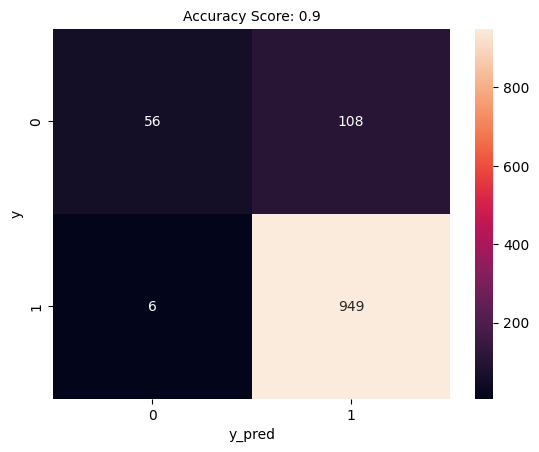

In [63]:
def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y_test, pred_val_idf)

In [64]:
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3)) 

X_train_tfidf_ngram=tf_idf_ngram_vectorizer.fit_transform(X_train).toarray()

X_test_tfidf_ngram =tf_idf_ngram_vectorizer.transform(X_test).toarray() 

In [65]:
#Words with TF-IDF
log_model_idf_ngram = LogisticRegression().fit(X_train_tfidf_ngram, y_train)

pred_val_idf_ngram= log_model_idf_ngram.predict(X_test_tfidf_ngram)

accuracy = accuracy_score(y_test, pred_val_idf_ngram)

print(f"Accuracy: {accuracy}")

cv_scores = cross_val_score(log_model_idf_ngram, X_train_tfidf_ngram, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")

print(f"Mean cross-validation score: {cv_scores.mean()}")

Accuracy: 0.8525469168900804
Cross-validation scores: [0.85363128 0.85251397 0.85139665 0.85139665 0.85234899]
Mean cross-validation score: 0.8522575081549248


In [66]:
## Rastgele bir yorumun seçilmesi 

random_comment= pd.Series.sample(X_test)

random_comment

4715    color vibrant material medium weight walk cove...
Name: Review, dtype: object

In [67]:
random=bow.transform(random_comment).toarray()

In [68]:
random=bow.transform(random_comment).toarray()

In [69]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

cv_scores__rf_tfıdf = cross_val_score(rf_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')

print(f" tfıdf Mean CV Accuracy: {cv_scores__rf_tfıdf.mean()}")

cv_scores_rf_bow = cross_val_score(rf_model, X_train_bow, y_train, cv=5, scoring='accuracy')

print(f" bow Mean CV Accuracy: {cv_scores_rf_bow.mean()}") 



# Cross-validation uygulama (5 katmanlı)

#cv_scores_rf_ngram = cross_val_score(rf_model, X_train_tfidf_ngram, y_train, cv=5, scoring='accuracy')
#print(f" ngram Mean CV Accuracy: {cv_scores_rf_ngram.mean()}")  

 tfıdf Mean CV Accuracy: 0.9128266656668294
 bow Mean CV Accuracy: 0.9199815030057616


In [ ]:
import plotly.graph_objects as go

# Retrieve the mean accuracy scores for each model
mean_scores = [cv_scores__rf_tfıdf.mean(), cv_scores_rf_bow.mean()]

model_names = ['TF-IDF', 'BoW']

# Create a bar chart
fig = go.Figure([go.Bar(x=model_names, y=mean_scores, text=mean_scores, textposition='auto')])

# Customize the chart (title and axis labels)
fig.update_layout(
    title="Cross-Validation Mean Accuracy Scores for Different Vectorizations",
    xaxis_title="Vectorization Techniques",
    yaxis_title="Mean Accuracy",
    yaxis=dict(range=[0, 1]),  # Set the Y-axis range from 0 to 1
    plot_bgcolor='white',  # Set the background color of the chart to white
    paper_bgcolor='white',  # Set the overall background color to white
    template="plotly"  # Default template
)

# Show numerical values on hover
fig.update_traces(marker_color='lightgreen', marker_line_color='darkgreen', marker_line_width=1.5, opacity=0.8)

# Display the chart
fig.show()

Result

Based on the results, we can see that the logistic regression model built with CountVectorizer outperformed the models using TF-IDF and TF-IDF with N-grams. Additionally, when RandomForest was applied to the same vectorization methods, we observed a noticeable improvement in performance, indicating that the model's accuracy increased with this more complex algorithm.
Conclusion

Hello again! It was really enjoyable for me to complete this work. I tried to concretize my analyzes on NLP Sentiment Analysis with this Amazon data set. If you liked the work I did on this subject, I am waiting for your comments. If you have any bugs or improvement suggestions, please share. Also, if you have suggestions or topics you would like to include in my future projects, let me know. I look forward to your contributions and thank you! 